### Import StockX 2019 Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Playtech\Desktop\StockX-Data-Contest-2019-3.csv')


### Converting data types

In [2]:
df['Sale Price'] = df['Sale Price'].replace('[\$,]', '', regex=True).astype(float)
df['Retail Price'] = df['Retail Price'].replace('[\$,]', '', regex=True).astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])

### Add in Profit and Profit Margin % columns

In [3]:
df['Profit'] = df['Sale Price'] - df['Retail Price']
df['Profit Margin %'] = (( df['Sale Price'] - df['Retail Price'] ) /  df['Retail Price']) * 100


### Add in Month and Year columns


In [4]:
df['Year'] = pd.to_datetime(df['Order Date']).dt.year
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit Margin %,Year,Month
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California,877.0,398.636364,2017,9
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California,465.0,211.363636,2017,9
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California,470.0,213.636364,2017,9
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky,855.0,388.636364,2017,9
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island,608.0,276.363636,2017,9


### Calculate and show sum of profit per month

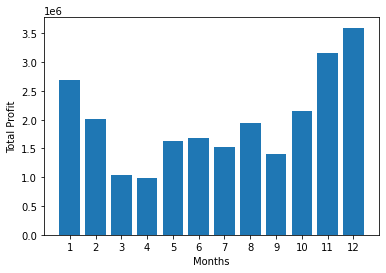

In [18]:
profit_per_month = df.groupby('Month').sum()['Profit']
months = range(1,13)

plt.bar(months, profit_per_month)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Profit')
plt.show()

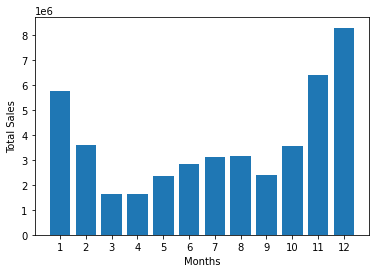

In [19]:
sales_per_month = df.groupby('Month').sum()['Sale Price']
months = range(1,13)

plt.bar(months, sales_per_month)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.show()

### Calculate the number of sales made per month

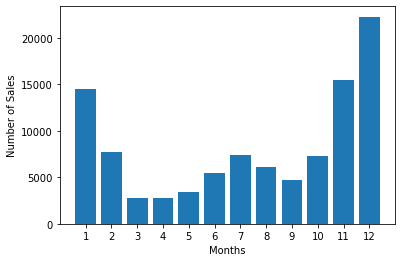

In [6]:
count_per_month = df.groupby('Month').count()['Order Date']
months = range(1,13)

plt.bar(months, count_per_month)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Number of Sales')
plt.show()

From this we can see that sales drop during spring, picking back up during summer and peaking during the holiday season, at the end of the year.

#### Show total sales count, sales, and profit for each brand.

In [70]:

df.groupby('Brand').agg({'Sneaker Name':'count', 'Sale Price': 'sum','Profit': 'sum'}).head()

,Sneaker Name,Sale Price,Profit
Brand,,,
Yeezy,72162,25980669.0,10114129.0
Off-White,27794,18663151.0,13677511.0


Yeezys sold nearly 3 times more, made more sales but loses out on total profit.

#### Let's look at the top 10 selling sneakers

In [36]:
product_count = df.groupby('Sneaker Name').count()['Order Date'].reset_index(name='count')
product_count.sort_values('count', ascending=False).head(10)
#products_count.sort_values('Sneaker Name', ascending=False)

,Sneaker Name,count
47,adidas-Yeezy-Boost-350-V2-Butter,11423
6,Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10395
16,Adidas-Yeezy-Boost-350-V2-Zebra,10110
7,Adidas-Yeezy-Boost-350-V2-Blue-Tint,9297
13,Adidas-Yeezy-Boost-350-V2-Cream-White,9097
15,Adidas-Yeezy-Boost-350-V2-Sesame,5553
48,adidas-Yeezy-Boost-350-V2-Static,4983
14,Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow,4854
18,Air-Jordan-1-Retro-High-Off-White-University-Blue,4635
49,adidas-Yeezy-Boost-350-V2-Static-Reflective,3184


We can see that 9 out of 10 sneakers are from Adidas and only 1 from Off-White.
As seen previously, Yeezys sold more but Off-White made more on sales and profit.
From this we can assume that the Sale Price for Off-White products are much higher than the products from Yeezy.

### Let's find out what could be the cause of this
#### Let's look at the mean sale price of both brands.

In [85]:
df.groupby('Brand')['Sale Price'].mean().reset_index(name='Mean sale price').round(2).head()


,Brand,Mean sale price
0,Yeezy,360.03
1,Off-White,671.48


#### Mean profit margin %

In [126]:
df.groupby('Brand')['Profit Margin %'].mean().reset_index(name='Mean Profit Margin').round(2).head()

,Brand,Mean Profit Margin
0,Yeezy,63.95
1,Off-White,282.87


#### The number of unique products for each brand

In [125]:
df.groupby('Brand').agg({'Sneaker Name':'nunique'})

,Sneaker Name
Brand,
Yeezy,20
Off-White,30


We can see there are less Yeezy products being sold than Off-White but more Yeezys have sold over time. This may be the case due to Yeezys having a lower mean sale price thus being more affordable to more people.

Off-Whites products having a higher mean sale price and profit margin could be due to supply and demand. As the sale price (resell price) for a pair of sneakers are determined by it. Low supply, high demand means a high resell value which means more profit.

However, the StockX platform which generates income through commission would be more interested in total sales price rather than the profit. Therefore to StockX, Yeezys would generate more income for them as they have a higher total sales than Off-White.


### Finally let's look at sales per region

In [118]:
df.groupby('Buyer Region')['Buyer Region'].count().sort_values(ascending=False).reset_index(name='count').head()

,Buyer Region,count
0,California,19349
1,New York,16525
2,Oregon,7681
3,Florida,6376
4,Texas,5876


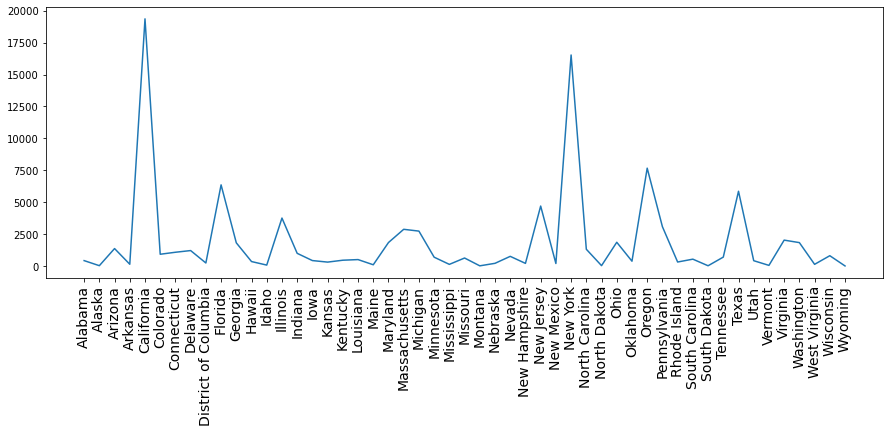

In [119]:
sale_per_region = df.groupby('Buyer Region')['Buyer Region'].count().reset_index(name='count')
regions = [region for region, df in df.groupby('Buyer Region')]

plt.plot(regions, sale_per_region['count'])
plt.xticks(rotation=90,fontsize=14)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

We can see that California has the highest number of sales followed by New York. This likely due to poopulation size of each region.
